### Лабораторна робота №5  (Візуалізація даних)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.widgets import Button, Slider, CheckButtons
from scipy.signal import butter, filtfilt

# Enable interactive plotting in Jupyter Notebook
%matplotlib notebook

In [2]:
t = np.linspace(0, 1, 1000)

# Initial parameters
init_amplitude = 5
init_frequency = 3
init_phase = 0
init_noise_mean = 0
init_noise_covariance = 0
init_show_noise = False

# Filter parameters
filter_order = 4  # You can adjust this
filter_frequency = 0.1  # You can adjust this

In [3]:
def butter_lowpass_filter(data, cutoff_freq, fs, order):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff_freq / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

In [4]:
def harmonic_with_noise(t, amplitude, frequency, phase, noise_mean, noise_covariance, show_noise):
    signal = amplitude * np.sin(2 * np.pi * frequency * t + phase)
    noise = np.random.normal(noise_mean, np.sqrt(noise_covariance), len(t))
    signal_with_noise = signal + noise if show_noise else signal
    return signal_with_noise

In [5]:
def update_plot(val):
    show_noise = check_button.get_status()[0]
    signal = harmonic_with_noise(t, amp_slider.val, freq_slider.val, phase_slider.val, noisemean_slider.val, noisecov_slider.val, show_noise)
    
    # Apply filter to the signal if show_noise is enabled
    if show_noise:
        filtered_signal = butter_lowpass_filter(signal, filter_frequency, 1.0, filter_order)
        line.set_ydata(signal)
        filtered_line.set_ydata(filtered_signal)
    else:
        line.set_ydata(signal)
        filtered_line.set_ydata(np.zeros_like(t))  # Set filtered line to zero if show_noise is disabled
    
    fig.canvas.draw_idle()

In [6]:
def reset_sliders(event):
    amp_slider.reset()
    freq_slider.reset()
    phase_slider.reset()
    noisemean_slider.reset()
    noisecov_slider.reset()
    check_button.set_active(init_show_noise)

<IPython.core.display.Javascript object>


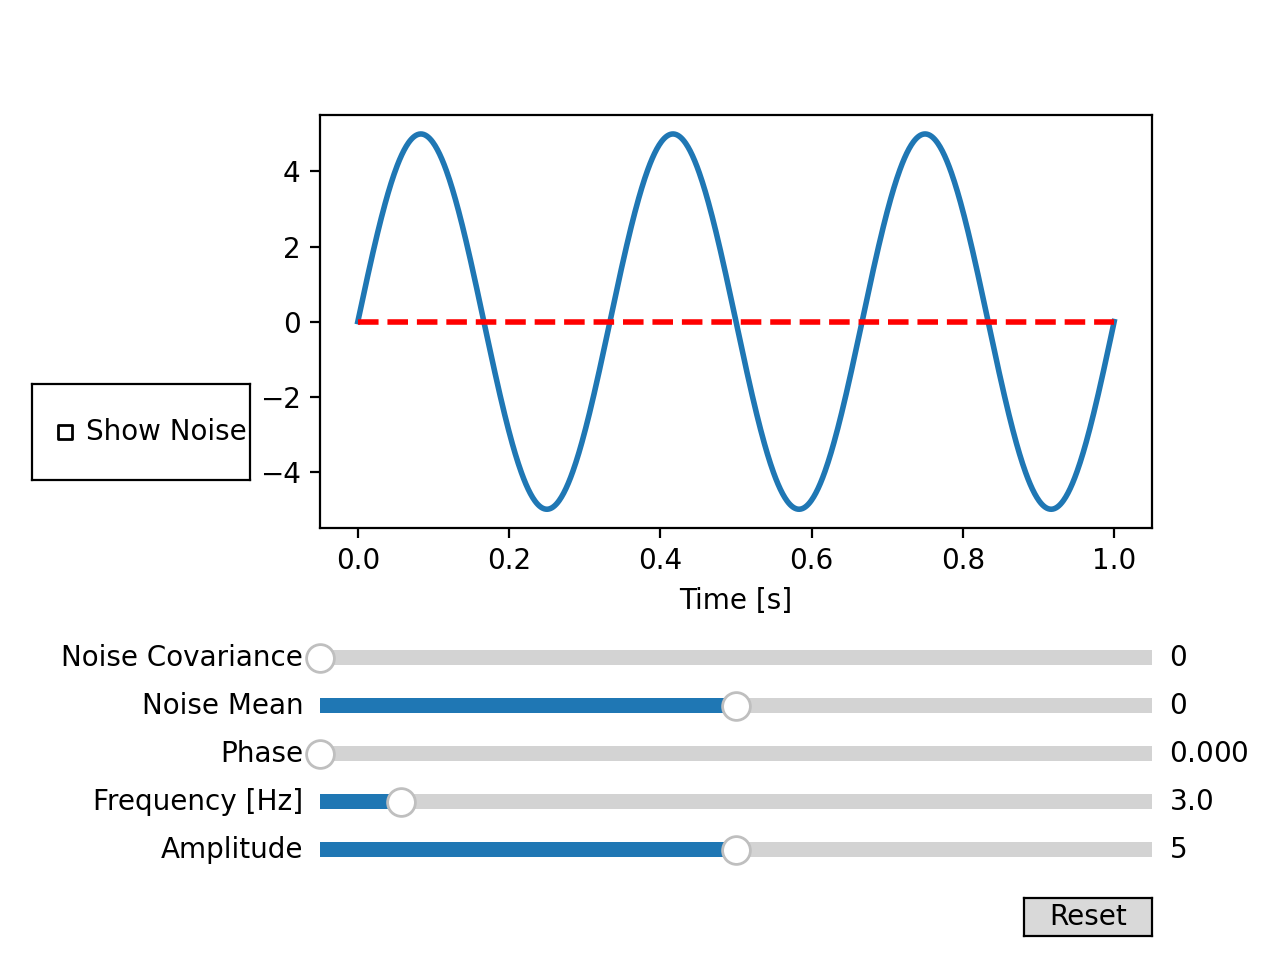

In [7]:
# Create the figure and the line that we will manipulate
fig, ax = plt.subplots()
line, = ax.plot(t, harmonic_with_noise(t, init_amplitude, init_frequency, init_phase, init_noise_mean, init_noise_covariance, init_show_noise), lw=2)
filtered_line, = ax.plot(t, np.zeros_like(t), lw=2, linestyle='dashed', label='Filtered Signal', color='red')  # Add a line for the filtered signal
ax.set_xlabel('Time [s]')

fig.subplots_adjust(left=0.25, bottom=0.45)

# Sliders for function parameters
axamp = fig.add_axes([0.25, 0.1, 0.65, 0.03])
amp_slider = Slider(ax=axamp, label='Amplitude', valmin=0, valmax=10, valinit=init_amplitude)

axfreq = fig.add_axes([0.25, 0.15, 0.65, 0.03])
freq_slider = Slider(ax=axfreq, label='Frequency [Hz]', valmin=0.1, valmax=30, valinit=init_frequency)

axphase = fig.add_axes([0.25, 0.20, 0.65, 0.03])
phase_slider = Slider(ax=axphase, label='Phase', valmin=0, valmax=2 * np.pi, valinit=init_phase)

# Sliders for noise parameters
axnoisemean = fig.add_axes([0.25, 0.25, 0.65, 0.03])
noisemean_slider = Slider(ax=axnoisemean, label='Noise Mean', valmin=-5, valmax=5, valinit=init_noise_mean)

axnoisecov = fig.add_axes([0.25, 0.30, 0.65, 0.03])
noisecov_slider = Slider(ax=axnoisecov, label='Noise Covariance', valmin=0, valmax=10, valinit=init_noise_covariance)

# Checkbox for show/hide noise
axcheck = fig.add_axes([0.025, 0.5, 0.17, 0.1])
check_button = CheckButtons(axcheck, labels=['Show Noise'], actives=[init_show_noise])

# Register the update function with each slider
amp_slider.on_changed(update_plot)
freq_slider.on_changed(update_plot)
phase_slider.on_changed(update_plot)
noisemean_slider.on_changed(update_plot)
noisecov_slider.on_changed(update_plot)

# Register the update function with the checkbox
check_button.on_clicked(update_plot)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values
resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')
button.on_clicked(reset_sliders)

# Show the plot interactively in the notebook
plt.show(block=False)
